<a href="https://colab.research.google.com/github/paritoshpr/IEM5703_Sp24/blob/main/Model03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simulation of a Die Roll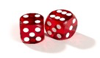

In [ ]:
'''
A simple program to demonstrate Model03_01 example from the book Simio and
Simulation, Modeling and Analysis by Smith and Sturrock
Copyright (C) 2024  Paritosh P Ramanan

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.
'''

Let us setup the experiment for the roll of 1 die.

First we start by importing the libraries

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

Set up the sample space $S = [1,2,3,4,5,6]$ and $P(X = x_i) = 1/6$


In [ ]:
S = [1,2,3,4,5,6]
P_x = float(1)/6
delta = float(1)/15

Next we need to simulate the roll of a die. How do we do that?

Sample from $u \sim Uniform(0,1)$

Then create a partition such that

$x_i$ = $ \begin{cases}
          1 & 0 \leq u \leq 1/6 \\
          2 & 1/6< u\leq 2/6  \\
          3 & 2/6< u\leq 3/6  \\
          4 & 3/6< u\leq 4/6  \\
          5 & 4/6< u\leq 5/6  \\
          6 & 5/6< u\leq 1
          \end{cases}
$


In [ ]:
def faceLookUp(u):
  if u <=P_x:
    return 1
  elif u> P_x and u<=2*P_x:
    return 2
  elif u>2*P_x and u<=3*P_x:
    return 3
  elif u>3*P_x and u<=4*P_x:
    return 4
  elif u>4*P_x and u<=5*P_x:
    return 5
  elif u>5*P_x and u<=1:
    return 6
  else:
    return -1

def faceLookUpBiased(u):
  if u <=4*P_x:
    return 1
  elif u> 4 * P_x and u<=4*P_x + delta:
    return 2
  elif u>4*P_x + delta and u<=4*P_x+2*delta:
    return 3
  elif u>4*P_x+2*delta and u<=4*P_x+3*delta:
    return 4
  elif u>4*P_x+3*delta and u<=4*P_x+4*delta:
    return 5
  elif u>4*P_x+4*delta and u<=1:
    return 6
  else:
    return -1

In [ ]:
u_dieFace = []
def printDieFace(u_dieFace):
  for roll in range(len(u_dieFace)):
    print("u={}, dieFace = {}, dieFaceProb={}".format(u_dieFace[roll][0],u_dieFace[roll][1],P_x))

In [ ]:
# TODO: simulate the roll of a die
u = np.random.rand()
dieFace = faceLookUp(u)
u_dieFace.append([u,dieFace])
printDieFace(u_dieFace)

Now lets do the roll of two die

In [ ]:
import pandas as pd
u_dieFace = []

In [ ]:

u1 = np.random.rand()
dieFace1 = faceLookUp(u1)

u2 = np.random.rand()
dieFace2 = faceLookUp(u2)

u_dieFace.append([u1,dieFace1,u2,dieFace2])

df = pd.DataFrame(u_dieFace)
df.columns = ['u1', '1st Die Roll', 'u2', '2nd Die Roll']

rollResults = df[['1st Die Roll','2nd Die Roll']]

print("So far you have collected {} no of observations".format(len(u_dieFace)))

In [ ]:
print(rollResults)

Lets gather some statistics of the rolls so far

In [ ]:
rollSum = rollResults.sum(axis=1)
print("Max Sum of Two Die Faces is {}".format(rollSum.max()))
print("Avg Sum of Two Die Faces is {}".format(rollSum.mean()))
print("Min Sum of Two Die Faces is {}".format(rollSum.min()))